# Association Rules for Market Basket Analysis

Association rule analysis attempts to find sets of informative patterns from large, sparse data sets. The basic idea of association rule mining is this: when events occur together more often than one would expect from their individual rates of occurrence, such cooccurrence is an interesting pattern. 
<br>
<br>
**Some terms to understand for association rules**
- An *association* is simply the co-occurrence of two or more things.
<br> Hot dogs might be positively associated with relish, hot dog buns, soda, potato chips, and ketchup.
- A *set of items* is a group of one or more items, and might be written as {item1, item2, ...}. 
<br> For instance, a set might be {relish} or {hot dogs, soda, potato chips}.
- A *transaction* is a set of items that co-occur in an observation. In marketing, a common transaction is the *market basket*, the set of things that are purchased or considered for purchase at one time.
- A *rule* expresses the incidence across transactions of one set of items as a condition of another set of items.
<br> The association of relish, conditional on hot dogs, is expressed in the rule {relish} ⇒ {hot dogs}.
<br>
<br>

**Some metrics to understand for association rules**
<br>
- The **support** for a set of items is the proportion of all transactions that contain the set.
<br> If {hot dogs, soda} appears in 10 out of 200 transactions, then support ({hotdogs, soda}) = 0.05.
<br>
<br>
- **Confidence** is the support for the co-occurrence of all items in a rule, conditional on the support for the left hand set alone.
\begin{equation*} confidence(X ⇒ Y ) = \frac {support (X ∩ Y )}{support(X)} \end{equation*}
<br>
If {relish} occurs in 1% of transactions (in other words, support ({relish}) = 0.01) and {relish, hot dogs} appears in 0.5%,
then confidence({relish} ⇒ {hotdogs}) = 0.005/0.1 = 0.5. In other words, hot dogs appear alongside relish 50% of the time that relish appears.
<br>
<br>
- **Lift** is the support of a set conditional on the joint support of each element.
\begin{equation*}  lift (X ⇒ Y ) = \frac {support (X ∩ Y )}{(support (X) * support (Y ))}\end{equation*}

<br>
To continue the hot dog example, if support ({relish}) = 0.01, support ({hotdogs}) = 0.01, and support ({relish, hotdogs}) = 0.005, then lift ({relish ⇒ hotdogs}) = 0.005/(0.01 ∗ 0.01) = 50. In other words, the combination {relish, hot dogs} occurs 50 times more often than we would expect if the two items were independent.
<br>
<br>
When we search for rules we wish to exceed a minimum threshold on each: to find item sets that occur relatively frequently
in transactions (support), that showstrong conditional relationships (confidence), and that are more common than chance (lift).


*For instance, if item A and B are bought together more frequently then several steps can be taken to increase the profit. For example:*

- A and B can be placed together so that when a customer buys one of the product he doesn't have to go far away to buy the other product.
- People who buy one of the products can be targeted through an advertisement campaign to buy the other.
- Collective discounts can be offered on these products if the customer buys both of them.
- Both A and B can be packaged together.

**Apriori algorithm**
<br> <br>
Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.

**Theory of Apriori Algorithm**
<br>
<br>
For large sets of data, there can be hundreds of items in hundreds of thousands transactions. The Apriori algorithm tries to extract rules for each possible combination of items. For instance, Lift can be calculated for item 1 and item 2, item 1 and item 3, item 1 and item 4 and then item 2 and item 3, item 2 and item 4 and then combinations of items e.g. item 1, item 2 and item 3; similarly item 1, item2, and item 4, and so on.

As you can see from the above example, this process can be extremely slow due to the number of combinations. To speed up the process, we need to perform the following steps:

- Set a minimum value for support and confidence. This means that we are only interested in finding rules for the items that have certain default existence (e.g. support) and have a minimum value for co-occurrence with other items (e.g. confidence).
- Extract all the subsets having higher value of support than minimum threshold.
- Select all the rules from the subsets with confidence value higher than minimum threshold.
- Order the rules by descending order of Lift.

Other datasets that can be used for analysis: 
- https://www.kaggle.com/gorkhachatryan01/purchase-behaviour 
- https://www.kaggle.com/irfanasrullah/groceries 
- https://www.kaggle.com/roshansharma/market-basket-optimization 

In [1]:
import pandas as pd
from apyori import apriori

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

import numpy as np

C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\tkaramyan\Anaconda3.1\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [20]:
store_data = pd.read_csv('data/groceries_groceries.csv')
store_data.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
store_data.sort_values(by=["Item(s)"], ascending=False)

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
1216,32,frankfurter,sausage,liver loaf,ham,chicken,beef,citrus fruit,tropical fruit,root vegetables,...,roll products,flour,pasta,margarine,specialty fat,sugar,soups,skin care,hygiene articles,candles
2938,29,meat,turkey,tropical fruit,root vegetables,onions,other vegetables,whole milk,butter,yogurt,...,dog food,bottled water,fruit/vegetable juice,rum,long life bakery product,chocolate,cooking chocolate,NaN,NaN,NaN
9001,29,sausage,pork,citrus fruit,tropical fruit,pip fruit,root vegetables,whole milk,butter,curd,...,fruit/vegetable juice,nut snack,chocolate,female sanitary products,hygiene articles,napkins,house keeping products,NaN,NaN,NaN
2973,29,beef,hamburger meat,tropical fruit,root vegetables,onions,other vegetables,whole milk,butter,yogurt,...,instant coffee,bottled beer,liquor (appetizer),long life bakery product,chocolate,napkins,house keeping products,NaN,NaN,NaN
5610,28,sausage,pip fruit,root vegetables,onions,whole milk,butter,dessert,soft cheese,cream cheese,...,misc. beverages,bottled beer,white wine,chocolate,abrasive cleaner,hygiene articles,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6898,1,liqueur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6903,1,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6906,1,newspapers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6907,1,soda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
store_data.drop(['Item(s)'], axis=1, inplace=True)

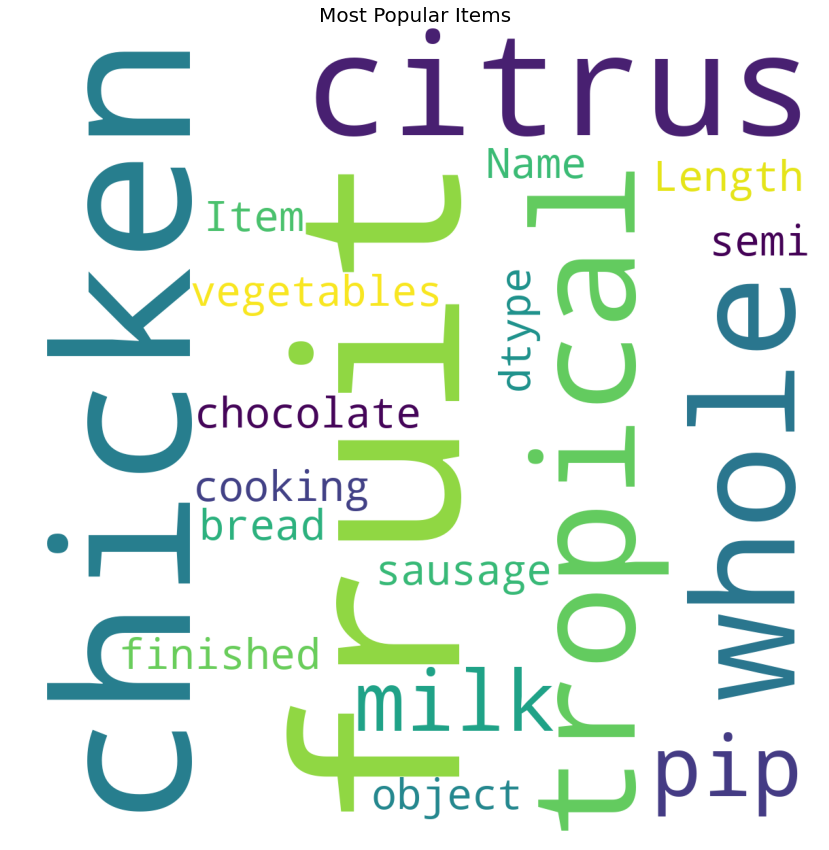

In [7]:
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 200).generate(str(store_data['Item 1']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

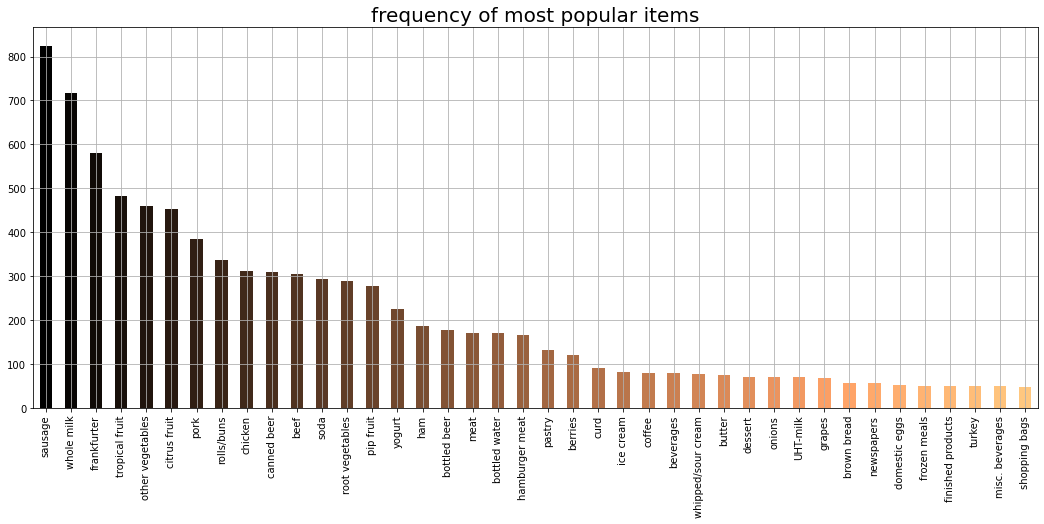

In [16]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
store_data['Item 1'].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

The Apriori library we are going to use requires our dataset to be in the form of a list of lists, where the whole dataset is a big list and each transaction in the dataset is an inner list within the outer big list.

In [9]:
records = []
for i in range(0, store_data.shape[0]):
    records.append([str(store_data.values[i,j]) for j in range(0, store_data.shape[1])])

In [13]:
records

[['citrus fruit',
  'semi-finished bread',
  'margarine',
  'ready soups',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['tropical fruit',
  'yogurt',
  'coffee',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole milk',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['pip fruit',
  'yogurt',
  'cream cheese',
  'meat spreads',
  'nan'

Let's suppose that we want rules for only those items that are purchased at least 5 times a day, or 7 x 5 = 35 times in one week, since our dataset is for a one-week time period. The support for those items can be calculated as 35/9835 = 0.0035. The minimum confidence for the rules is 20% or 0.2. Similarly, we specify the value for lift as 3 and finally min_length is 2 since we want at least two products in our rules.

In [17]:
association_rules = apriori(records, min_support=0.0035, min_confidence=0.2, min_lift=2, min_length=2)
association_results = list(association_rules)

In [18]:
association_results[0]

RelationRecord(items=frozenset({'baking powder', 'other vegetables'}), support=0.007320793085917641, ordered_statistics=[OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'other vegetables'}), confidence=0.41379310344827586, lift=2.138547121604726)])

The support value for the first rule is 0.0073. This number is calculated by dividing the number of transactions containing other vegetables divided by total number of transactions. The confidence level for the rule is 0.414 which shows that out of all the transactions that contain other vegetables, 41.4% of the transactions also contain baking powder. Finally, the lift of 2.14 tells us that baking powder is 2.14 times more likely to be bought by the customers who buy other vegetables compared to the default likelihood of the sale of baking powder.

In [19]:
for item in association_results:

    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: baking powder -> other vegetables
Support: 0.007320793085917641
Confidence: 0.41379310344827586
Lift: 2.138547121604726
Rule: baking powder -> tropical fruit
Support: 0.0037620742247076767
Confidence: 0.21264367816091953
Lift: 2.0265024948765924
Rule: baking powder -> whipped/sour cream
Support: 0.004575495678698526
Confidence: 0.25862068965517243
Lift: 3.607850330154072
Rule: baking powder -> whole milk
Support: 0.009252669039145907
Confidence: 0.5229885057471264
Lift: 2.0467934556398677
Rule: beef -> root vegetables
Support: 0.017386883579054397
Confidence: 0.3313953488372093
Lift: 3.0403668431100312
Rule: berries -> whipped/sour cream
Support: 0.009049313675648195
Confidence: 0.27217125382262997
Lift: 3.796885505454703
Rule: berries -> yogurt
Support: 0.010574478901881037
Confidence: 0.3180428134556575
Lift: 2.279847718904075
Rule: bottled beer -> liquor
Support: 0.004677173360447382
Confidence: 0.4220183486238532
Lift: 5.240594013529793
Rule: bottled beer -> red/blush wine
Su

Lift: 2.382657058617348
Rule: nan -> fruit/vegetable juice
Support: 0.003965429588205389
Confidence: 0.3823529411764706
Lift: 3.6473726250927143
Rule: nan -> citrus fruit
Support: 0.0037620742247076767
Confidence: 0.45121951219512196
Lift: 2.3331986868764587
Rule: nan -> onions
Support: 0.0035587188612099642
Confidence: 0.6363636363636364
Lift: 3.2905553962336294
Rule: nan -> pip fruit
Support: 0.005897305541433655
Confidence: 0.20422535211267603
Lift: 2.699672497349689
Rule: nan -> root vegetables
Support: 0.010269445856634469
Confidence: 0.3556338028169014
Lift: 3.2657875356715453
Rule: nan -> citrus fruit
Support: 0.004372140315200813
Confidence: 0.38738738738738737
Lift: 2.0031308911435093
Rule: nan -> tropical fruit
Support: 0.008947635993899338
Confidence: 0.30985915492957744
Lift: 2.955833936694854
Rule: nan -> whipped/sour cream
Support: 0.005592272496187087
Confidence: 0.514018691588785
Lift: 2.657925253299527
Rule: nan -> whole milk
Support: 0.012913065582104729
Confidence: 0

SyntaxError: invalid syntax (<ipython-input-26-a3a9a3d7edcd>, line 2)